In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
from outlier_utils import createDataFrame, keepOnlyOutliers, outlier_detection,\
                is_extreme_point, calc_Precision, visualize_outliers, find_best_outliers_window

## IDX options

In [3]:
pickle_dir = '../results_pickle_format'

In [4]:
with open(f'{pickle_dir}/IDX_options.pkl', 'rb') as f:
    idx_opt = pickle.load(f)

In [5]:
with open(f'{pickle_dir}/n_beats_interval_8w_IDX_2007-2009.pkl', 'rb') as f:
    idx_8w_nbeats_mapes = pickle.load(f)

In [6]:
with open(f'{pickle_dir}/n_beats_interval_12w_IDX_2007-2009.pkl', 'rb') as f:
    idx_12w_nbeats_mapes = pickle.load(f)

In [7]:
with open(f'{pickle_dir}/n_beats_interval_14w_IDX_2007-2009.pkl', 'rb') as f:
    idx_14w_nbeats_mapes = pickle.load(f)

In [8]:
with open(f'{pickle_dir}/n_beats_interval_14w_IDX_2010-2013.pkl', 'rb') as f:
    idx_14w_2010_nbeats_mapes = pickle.load(f)

In [9]:
with open(f'{pickle_dir}/n_beats_interval_14w_IDX_2013-2015.pkl', 'rb') as f:
    idx_14w_2013_nbeats_mapes = pickle.load(f)

In [10]:
with open(f'{pickle_dir}/arima_interval_8w_IDX_2010-2013.pkl', 'rb') as f:
    idx_8w_2010_arima_mapes = pickle.load(f)

In [11]:
with open(f'{pickle_dir}/arima_interval_8w_IDX_2014-2017.pkl', 'rb') as f:
    idx_8w_2013_arima_mapes = pickle.load(f)

In [12]:
with open(f'{pickle_dir}/n_beats_interval_14w_IDX_2015-2017.pkl', 'rb') as f:
    idx_14w_2015_nbeats_mapes = pickle.load(f)

In [13]:
with open(f'{pickle_dir}/n_beats_interval_16w_IDX_2007-2009.pkl', 'rb') as f:
    idx_16w_nbeats_mapes = pickle.load(f)

In [14]:
with open(f'{pickle_dir}/n_beats_interval_20w_IDX_2007-2009.pkl', 'rb') as f:
    idx_20w_nbeats_mapes = pickle.load(f)

In [15]:
idx_8w_nbeats_df = createDataFrame(idx_8w_nbeats_mapes, '8w_nbeats_mape').multiply(100) 
idx_12w_nbeats_df = createDataFrame(idx_12w_nbeats_mapes, '12w_nbeats_mape').multiply(100) 
idx_14w_nbeats_df = createDataFrame(idx_14w_nbeats_mapes, '14w_nbeats_mape').multiply(100) 
idx_14w_2010_nbeats_df = createDataFrame(idx_14w_2010_nbeats_mapes, '14w_2010_nbeats_mape').multiply(100) 
idx_14w_2013_nbeats_df = createDataFrame(idx_14w_2013_nbeats_mapes, '14w_2013_nbeats_mape').multiply(100) 
idx_8w_2010_arima_df = createDataFrame(idx_8w_2010_arima_mapes, '8w_2010_arima_mape').multiply(100) 
idx_8w_2013_arima_df = createDataFrame(idx_8w_2013_arima_mapes, '8w_2013_arima_mape').multiply(100) 
idx_14w_2015_nbeats_df = createDataFrame(idx_14w_2015_nbeats_mapes, '14w_2015_nbeats_mape').multiply(100) 
idx_16w_nbeats_df = createDataFrame(idx_16w_nbeats_mapes, '16w_nbeats_mape').multiply(100)
idx_20w_nbeats_df = createDataFrame(idx_20w_nbeats_mapes, '20w_nbeats_mape').multiply(100)

In [16]:
idx_8w_nbeats_df.head(3)

8w_nbeats_mape
Date                      
2007-01-15       14.908362
2007-01-22      122.102459
2007-01-29       23.608713

We are taking N weeks moving windows for finding if last week is outlier. 

In [17]:
idx_8w_nbeats_df.columns[0]

'8w_nbeats_mape'

In [18]:
nbeats_8w_outlier_windows = [4, 5, 6, 7, 8]
nbeats_8w_best_interval, nbeats_8w_best_precision, nbeats_8w_anomalies = find_best_outliers_window(idx_8w_nbeats_df, nbeats_8w_outlier_windows, idx_opt)

In [19]:
nbeats_8w_best_interval, nbeats_8w_best_precision, nbeats_8w_anomalies

(5,
 0.6666666666666666,
 [datetime.datetime(2007, 3, 5, 0, 0),
  datetime.datetime(2007, 4, 23, 0, 0),
  datetime.datetime(2007, 7, 9, 0, 0),
  datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2007, 10, 1, 0, 0),
  datetime.datetime(2007, 10, 8, 0, 0),
  datetime.datetime(2008, 1, 21, 0, 0),
  datetime.datetime(2008, 3, 17, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2009, 2, 9, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 8, 17, 0, 0)])

In [20]:
nbeats_12w_outlier_windows = list(range(4,13))
nbeats_12w_best_interval, nbeats_12w_best_precision, nbeats_12w_anomalies = find_best_outliers_window(idx_12w_nbeats_df, nbeats_12w_outlier_windows, idx_opt)

In [21]:
nbeats_12w_best_interval, nbeats_12w_best_precision, nbeats_12w_anomalies

(12,
 0.7142857142857143,
 [datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2008, 10, 6, 0, 0),
  datetime.datetime(2008, 10, 13, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 4, 13, 0, 0),
  datetime.datetime(2009, 8, 17, 0, 0)])

In [22]:
nbeats_14w_outlier_windows = list(range(4,15))
nbeats_14w_best_interval, nbeats_14w_best_precision, nbeats_14w_anomalies = find_best_outliers_window(idx_14w_nbeats_df, nbeats_14w_outlier_windows, idx_opt)

In [23]:
nbeats_14w_best_interval, nbeats_14w_best_precision, nbeats_14w_anomalies

(12,
 0.8571428571428571,
 [datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2008, 1, 21, 0, 0),
  datetime.datetime(2008, 6, 23, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2008, 10, 6, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 4, 6, 0, 0)])

In [24]:
nbeats_16w_outlier_windows = list(range(4,17))
nbeats_16w_best_interval, nbeats_16w_best_precision, nbeats_16w_anomalies = find_best_outliers_window(idx_16w_nbeats_df, nbeats_16w_outlier_windows, idx_opt)

In [25]:
nbeats_16w_best_interval, nbeats_16w_best_precision, nbeats_16w_anomalies

(13,
 0.7272727272727273,
 [datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2007, 8, 20, 0, 0),
  datetime.datetime(2007, 10, 22, 0, 0),
  datetime.datetime(2008, 1, 21, 0, 0),
  datetime.datetime(2008, 6, 23, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2008, 10, 6, 0, 0),
  datetime.datetime(2008, 10, 13, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 4, 13, 0, 0),
  datetime.datetime(2009, 8, 17, 0, 0)])

In [26]:
nbeats_20w_outlier_windows = list(range(4,21))
nbeats_20w_best_interval, nbeats_20w_best_precision, nbeats_20w_anomalies = find_best_outliers_window(idx_20w_nbeats_df, nbeats_20w_outlier_windows, idx_opt)

In [27]:
nbeats_20w_best_interval, nbeats_20w_best_precision, nbeats_20w_anomalies

(13,
 0.75,
 [datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2008, 1, 21, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2008, 10, 6, 0, 0),
  datetime.datetime(2008, 10, 13, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 4, 13, 0, 0),
  datetime.datetime(2009, 8, 17, 0, 0)])

<AxesSubplot:xlabel='Date'>

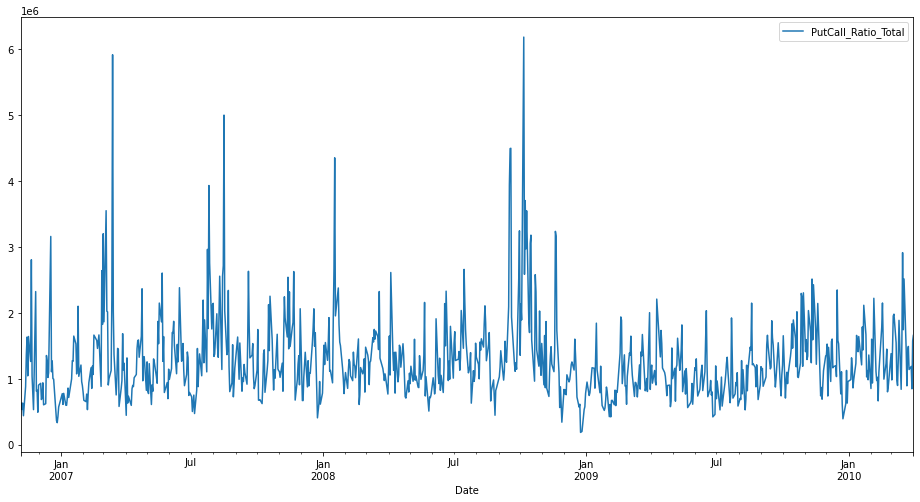

In [28]:
idx_opt[:'2010-04-01'].plot(figsize=(16,8))

In [29]:
idx_opt1 = idx_opt[:'2010-04-01']

In [30]:
nbeats_8w_detection = outlier_detection(idx_opt1, nbeats_8w_anomalies)
nbeats_12w_detection = outlier_detection(idx_opt1, nbeats_12w_anomalies)
nbeats_14w_detection = outlier_detection(idx_opt1, nbeats_14w_anomalies)
nbeats_16w_detection = outlier_detection(idx_opt1, nbeats_16w_anomalies)
nbeats_20w_detection = outlier_detection(idx_opt1, nbeats_20w_anomalies)


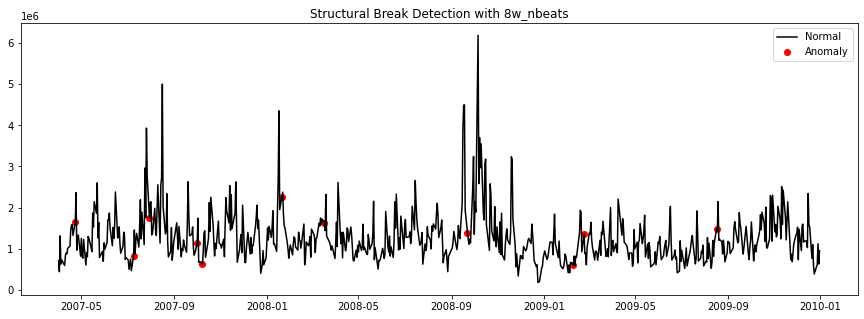

In [31]:
visualize_outliers(nbeats_8w_detection, '8w_nbeats', '2007-04-01', '2009-12-31') 

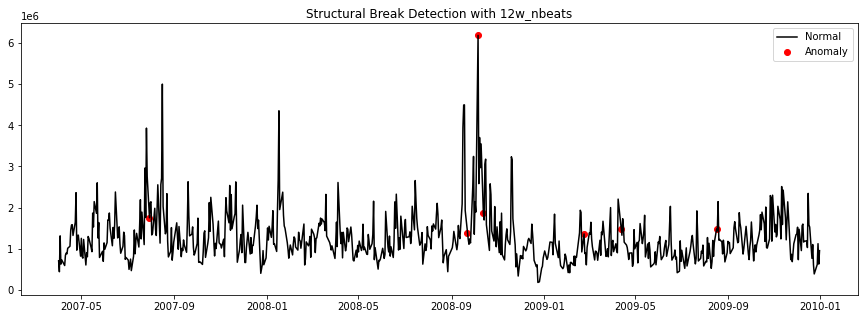

In [32]:
visualize_outliers(nbeats_12w_detection, '12w_nbeats', '2007-04-01', '2009-12-31') 

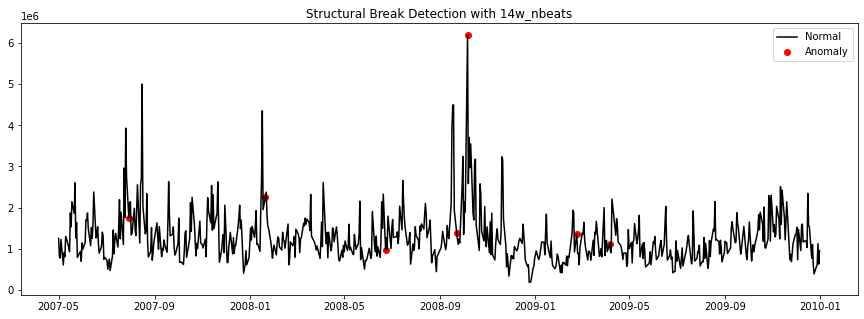

In [33]:
visualize_outliers(nbeats_14w_detection, '14w_nbeats', '2007-05-01', '2009-12-31') 

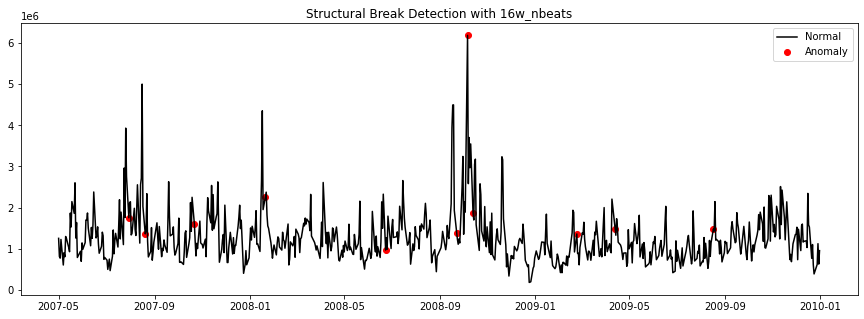

In [34]:
visualize_outliers(nbeats_16w_detection, '16w_nbeats', '2007-05-01', '2009-12-31') 

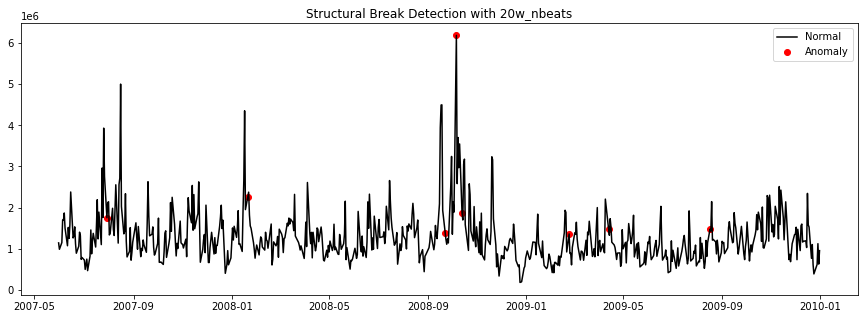

In [35]:
visualize_outliers(nbeats_20w_detection, '20w_nbeats', '2007-05-31', '2009-12-31') 

Check anomalies are at extreme points 

In [36]:
nbeats_8w_best_interval, nbeats_8w_best_precision

(5, 0.6666666666666666)

In [37]:
nbeats_12w_best_interval, nbeats_12w_best_precision

(12, 0.7142857142857143)

In [38]:
nbeats_14w_best_interval, nbeats_14w_best_precision

(12, 0.8571428571428571)

In [39]:
nbeats_16w_best_interval, nbeats_16w_best_precision

(13, 0.7272727272727273)

In [40]:
nbeats_20w_best_interval, nbeats_20w_best_precision

(13, 0.75)

We found the 14w train interval with 12w anomaly detection provide the best Precision. 
We want to see how it perform in around 2011 and 2015 time period.

In [41]:
n = 12
df1 = idx_14w_2010_nbeats_df
upper_limit = df1.shape[0] - n 
nbeats_14w_2010_anomaly = []
for i in range(upper_limit):
    dfw = df1[i:i+n]
    outlier = keepOnlyOutliers(dfw, '14w_2010_nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_14w_2010_anomaly.append(anomaly)
        
nbeats_14w_2010_anomaly

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 21, 0, 0),
 datetime.datetime(2011, 3, 18, 0, 0),
 datetime.datetime(2011, 6, 3, 0, 0),
 datetime.datetime(2011, 8, 5, 0, 0),
 datetime.datetime(2011, 8, 12, 0, 0),
 datetime.datetime(2011, 11, 18, 0, 0),
 datetime.datetime(2011, 12, 30, 0, 0),
 datetime.datetime(2012, 2, 17, 0, 0),
 datetime.datetime(2012, 5, 18, 0, 0),
 datetime.datetime(2012, 9, 21, 0, 0)]

In [42]:
n = 6
df1a = idx_8w_2010_arima_df
upper_limit = df1a.shape[0] - n 
arima_8w_2010_anomaly = []
for i in range(upper_limit):
    dfw = df1a[i:i+n]
    outlier = keepOnlyOutliers(dfw, '8w_2010_arima_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        arima_8w_2010_anomaly.append(anomaly)
        
arima_8w_2010_anomaly

[datetime.datetime(2010, 5, 28, 0, 0),
 datetime.datetime(2010, 10, 22, 0, 0),
 datetime.datetime(2010, 12, 10, 0, 0),
 datetime.datetime(2011, 3, 25, 0, 0),
 datetime.datetime(2011, 12, 2, 0, 0),
 datetime.datetime(2011, 12, 23, 0, 0),
 datetime.datetime(2011, 12, 30, 0, 0),
 datetime.datetime(2012, 4, 27, 0, 0),
 datetime.datetime(2012, 10, 26, 0, 0)]

In [43]:
n = 12 
df2 = idx_14w_2013_nbeats_df
upper_limit = df2.shape[0] - n 
nbeats_14w_2013_anomaly = []
for i in range(upper_limit):
    dfw = df2[i:i+n]
    outlier = keepOnlyOutliers(dfw, '14w_2013_nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_14w_2013_anomaly.append(anomaly)
        
nbeats_14w_2013_anomaly

[datetime.datetime(2014, 1, 28, 0, 0),
 datetime.datetime(2014, 8, 5, 0, 0),
 datetime.datetime(2014, 10, 14, 0, 0),
 datetime.datetime(2015, 6, 9, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 8, 25, 0, 0),
 datetime.datetime(2015, 10, 20, 0, 0),
 datetime.datetime(2015, 12, 15, 0, 0),
 datetime.datetime(2015, 12, 29, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0)]

In [44]:
n = 6 
df2a = idx_8w_2013_arima_df
upper_limit = df2a.shape[0] - n 
arima_8w_2013_anomaly = []
for i in range(upper_limit):
    dfw = df2a[i:i+n]
    outlier = keepOnlyOutliers(dfw, '8w_2013_arima_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        arima_8w_2013_anomaly.append(anomaly)
        
arima_8w_2013_anomaly

[datetime.datetime(2014, 10, 15, 0, 0),
 datetime.datetime(2014, 10, 22, 0, 0),
 datetime.datetime(2014, 12, 24, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 4, 1, 0, 0),
 datetime.datetime(2015, 7, 8, 0, 0),
 datetime.datetime(2015, 8, 26, 0, 0),
 datetime.datetime(2015, 9, 2, 0, 0),
 datetime.datetime(2015, 10, 14, 0, 0),
 datetime.datetime(2015, 12, 30, 0, 0),
 datetime.datetime(2016, 3, 16, 0, 0),
 datetime.datetime(2016, 4, 27, 0, 0),
 datetime.datetime(2016, 7, 6, 0, 0),
 datetime.datetime(2016, 12, 28, 0, 0)]

In [45]:
n = 12
df3 = idx_14w_2015_nbeats_df
upper_limit = df3.shape[0] - n 
nbeats_14w_2015_anomaly = []
for i in range(upper_limit):
    dfw = df3[i:i+n]
    outlier = keepOnlyOutliers(dfw, '14w_2015_nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_14w_2015_anomaly.append(anomaly)
        
nbeats_14w_2015_anomaly

[datetime.datetime(2014, 8, 6, 0, 0),
 datetime.datetime(2014, 9, 24, 0, 0),
 datetime.datetime(2014, 10, 15, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 8, 26, 0, 0),
 datetime.datetime(2015, 12, 16, 0, 0),
 datetime.datetime(2015, 12, 30, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 6, 15, 0, 0),
 datetime.datetime(2016, 6, 22, 0, 0),
 datetime.datetime(2016, 6, 29, 0, 0),
 datetime.datetime(2016, 11, 9, 0, 0),
 datetime.datetime(2017, 3, 22, 0, 0)]

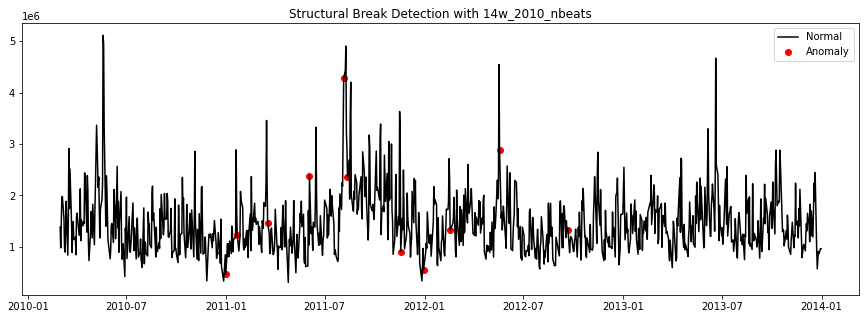

In [46]:
idx_opt2 = idx_opt['2010-01-01':]
nbeats_14w_2010_detection = outlier_detection(idx_opt2, nbeats_14w_2010_anomaly)
visualize_outliers(nbeats_14w_2010_detection, '14w_2010_nbeats', '2010-03-01', '2013-12-31') 

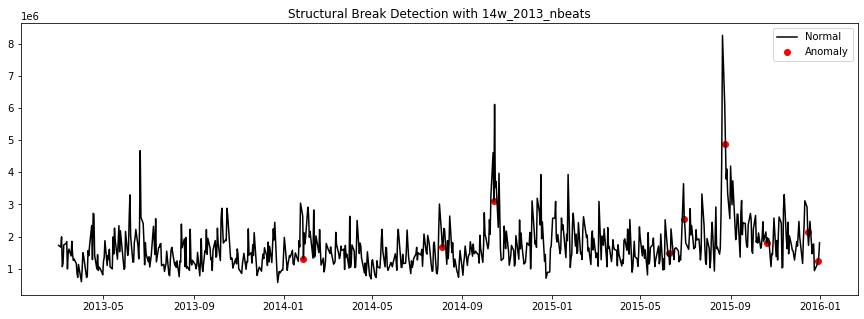

In [47]:
idx_opt3 = idx_opt['2013-01-01':]
nbeats_14w_2013_detection = outlier_detection(idx_opt2, nbeats_14w_2013_anomaly)
visualize_outliers(nbeats_14w_2013_detection, '14w_2013_nbeats', '2013-03-01', '2015-12-31') 

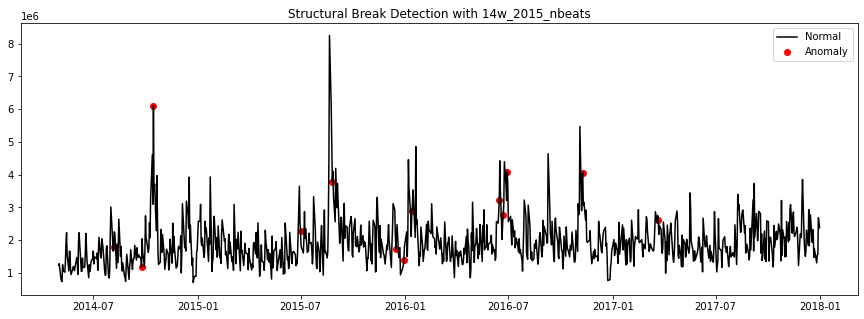

In [48]:
idx_opt4 = idx_opt['2014-01-01':]
nbeats_14w_2015_detection = outlier_detection(idx_opt4, nbeats_14w_2015_anomaly)
visualize_outliers(nbeats_14w_2015_detection, '14w_2015_nbeats', '2014-05-01', '2017-12-31') 

In [49]:
calc_Precision(arima_8w_2010_anomaly, idx_opt2)

0.5555555555555556

In [50]:
calc_Precision(arima_8w_2013_anomaly, idx_opt3)

0.5

In [51]:
calc_Precision(nbeats_14w_2010_anomaly, idx_opt2)

0.7272727272727273

In [52]:
calc_Precision(nbeats_14w_2013_anomaly, idx_opt3)

0.5

In [53]:
calc_Precision(nbeats_14w_2015_anomaly, idx_opt4)

0.5384615384615384